# 2110433 - Computer Vision (2024/2)
## Lab 2 - Basic Image Processing
In this lab, we will play with basic image pixel manipulation in grayscale images. This notebook includes both coding and written questions. Please hand in this notebook file with all outputs and your answer

Import OpenCV, Numpy and Matplotlib as always

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from ipywidgets import interact
import ipywidgets as widgets
import urllib.request
import json
%matplotlib inline

Use <a href="https://docs.opencv.org/3.4.1/d4/da8/group__imgcodecs.html#ga288b8b3da0892bd651fce07b3bbd3a56">imread</a>  function to read image from file in <b>grayscale</b> format and display its dimension

In [2]:
inputImage = cv2.imread("assets/lena_std.tif",cv2.IMREAD_GRAYSCALE)
print('inputImage variable data type =>', type(inputImage))
print('inputImage variable numpy data type =>', inputImage.dtype)
print('inputImage dimensions', inputImage.shape)
print(inputImage)

inputImage variable data type => <class 'numpy.ndarray'>
inputImage variable numpy data type => uint8
inputImage dimensions (512, 512)
[[162 162 162 ... 170 155 128]
 [162 162 162 ... 170 155 128]
 [162 162 162 ... 170 155 128]
 ...
 [ 43  43  50 ... 104 100  98]
 [ 44  44  55 ... 104 105 108]
 [ 44  44  55 ... 104 105 108]]


We need to specify matplotlib imshow <a href="https://matplotlib.org/tutorials/colors/colormaps.html">colormap</a> (cmap) as gray to display grayscale images.

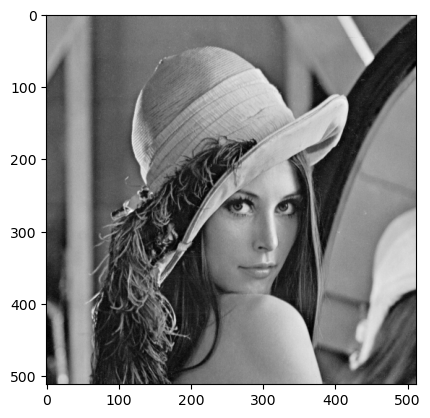

In [3]:
plt.imshow(inputImage, cmap='gray')
plt.show()

## Basic Numpy and Pixel Manipulation 
This section is mostly modifed from Standford CS131 Numpy Tutorial!

### Create Numpy Array
There are many ways to create a numpy array. For examples,
- Convert other Python data structures to np.array
- Use numpy functions to create new arrays (ex. np.ones, np.zeros, np.arange, np.randn, np.eye)
- Reading from file (in this class, images and videos!)

In [4]:
# From python list
a = np.array([[1,2,3,4,5],[6,7,8,9,10]])
print(a, a.shape)

print('===')
# From numpy function
b = np.eye(3)
print(b, b.shape)

# From numpy function
b = np.eye(3)
print(b, b.shape)

print('===')
# From file (image!)
c = cv2.imread('assets/lena_std.tif')
print(c.shape)

[[ 1  2  3  4  5]
 [ 6  7  8  9 10]] (2, 5)
===
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]] (3, 3)
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]] (3, 3)
===
(512, 512, 3)


### Numpy array attributes
Every numpy array is a grid of elements of the same type. Numpy provides a large set of numeric datatypes that you can use to construct arrays. Numpy tries to guess a datatype when you create an array, but functions that construct arrays usually also include an optional argument to explicitly specify the datatype. Take a look at the attributes associated with a numpy array, and then we'll explore how numpy arrays determine their type.

In [5]:
print(c.shape) #tuple of dimensions
print(c.size) #total number of elements
print(c.dtype) #array data type

(512, 512, 3)
786432
uint8


In [6]:
a = np.array([1, 2])  # Let numpy choose the datatype
b = np.array([1.0, 2.0])  # Let numpy choose the datatype (default for floting point precision in numpy is 64-bit)
c = np.array([1, 2], dtype=np.int64)  # Specify data type

print(a.dtype, b.dtype, c.dtype)

int64 float64 int64


<b>You can discovery more about each data types range</b> <a href="https://numpy.org/doc/stable/user/basics.types.html">here</a>

### Accessing array elements
Numpy offers several ways to index into arrays. When arrays are one dimensional, indexing works just like lists. When arrays are 2 or more dimensional, you must an index for each dimension

In [7]:
# Create a 2-dimensional array (matrix)
# [[ 1  2  3]
#  [ 4  5  6]]

a = np.array([[1,2,3],[4,5,6]])   
print(a)

# Access the 3 with array indexing
a_3 = a[0,2]
print("expecting 3, got: ", a_3)

# Access the 4 with array indexing
a_4 = a[1,0]
print("expecting 4, got: ", a_4)

[[1 2 3]
 [4 5 6]]
expecting 3, got:  3
expecting 4, got:  4


In [8]:
a = np.arange(16)
print('np.arange', a)
a = a.reshape(4,4)
print('reshape', a.shape)
print(a)

# Access numpy slice
print('Row 0 ,Col 1-2')
print(a[0,1:3])

print('Row 0-1,Col 1-2')
print(a[0:2,1:3])

# Expected output for b
# [[1,2,3]
#  [5,6,7]
#  [9,10,11]
#  [13,14,15]]

print('==== b ====')
b = np.array([i for i in range(1, 15+1) if i%4 != 0]).reshape(4, 3)
print(b)


# # Expected output for c
# # [[8,9,10,11]
# #  [12,13,14,15]]
print('==== c ====')
c = np.arange(8, 15+1).reshape(2, 4)
print(c)

np.arange [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
reshape (4, 4)
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]
Row 0 ,Col 1-2
[1 2]
Row 0-1,Col 1-2
[[1 2]
 [5 6]]
==== b ====
[[ 1  2  3]
 [ 5  6  7]
 [ 9 10 11]
 [13 14 15]]
==== c ====
[[ 8  9 10 11]
 [12 13 14 15]]


In [9]:
%%time
# Bad practice, you should not do this
inputImageTest = inputImage.copy()
for row in range(0,100):
    for col in range(0,inputImageTest.shape[1]):
        inputImageTest[row,col] = 255

CPU times: user 7.29 ms, sys: 1.3 ms, total: 8.59 ms
Wall time: 15.5 ms


In [10]:
%%time
# Slice indexing version is a lot faster!
inputImageTest = inputImage.copy()
inputImageTest[0:100,:] = 255

CPU times: user 183 μs, sys: 86 μs, total: 269 μs
Wall time: 737 μs


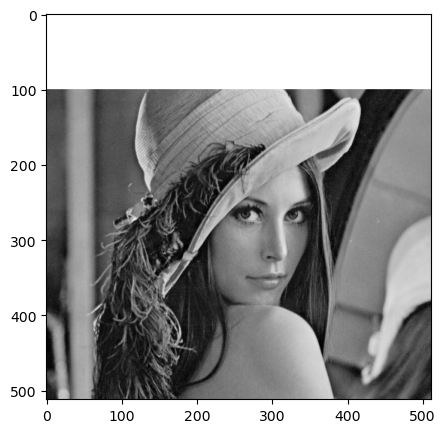

In [11]:
plt.figure(figsize=(5,5))
plt.imshow(inputImageTest, cmap='gray')
plt.show()

### Axis-based operations

Now that we've covered 2d indexing, there's some important numpy functions that operate on a particular axis, so let's get hands on with sum()! Many numpy operations including sum, max, argmax, mean, standard deviation operate over a chosen axis of your array.

In [12]:
a = np.arange(16)
print('np.arange', a)
a = a.reshape(4,4)
print('reshape', a.shape)
print(a)

np.arange [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
reshape (4, 4)
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]


In [13]:
meanA = np.mean(a)
print('Array mean', meanA)

meanA_1 = np.mean(a, axis=0) # column
print('Array mean along first axis', meanA_1)

meanA_2 = np.mean(a, axis=1) # row
print('Array mean along second axis', meanA_2)

print('=====')

sumA = np.sum(a)
print('Array sum', sumA)

sumA_1 = np.sum(a,axis=0)
print('Array sum along first axis', sumA_1)

Array mean 7.5
Array mean along first axis [6. 7. 8. 9.]
Array mean along second axis [ 1.5  5.5  9.5 13.5]
=====
Array sum 120
Array sum along first axis [24 28 32 36]


In [14]:
%%time
# Bad practice, you should not do this
inputImageTest = inputImage.copy()
meanImageVal = 0
for row in range(0,inputImageTest.shape[0]):
    for col in range(0,inputImageTest.shape[1]):
        meanImageVal+=inputImageTest[row,col]
meanImageVal /= inputImageTest.size
print(meanImageVal)

0.00072479248046875
CPU times: user 109 ms, sys: 5.54 ms, total: 114 ms
Wall time: 131 ms


<timed exec>:6: RuntimeWarning: overflow encountered in scalar add


In [15]:
%%time
meanImageVal = np.mean(inputImage)
print(meanImageVal)

124.04857635498047
CPU times: user 468 μs, sys: 128 μs, total: 596 μs
Wall time: 443 μs


In [16]:
# These function can also apply on indexing slice
sliceA = a[0:3, 1:]
print(sliceA, 'Sum',np.sum(sliceA), 'Mean',np.mean(sliceA), 'Std',np.std(sliceA))

[[ 1  2  3]
 [ 5  6  7]
 [ 9 10 11]] Sum 54 Mean 6.0 Std 3.366501646120693


### Matrix Operation

In [17]:
x = np.array([[1,2],[3,4]], dtype=np.float64)
y = np.array([[5,6],[7,8]], dtype=np.float64)

print("x = \n", x)
print(x.dtype)
print("y = \n", y)
print(y.dtype)

x = 
 [[1. 2.]
 [3. 4.]]
float64
y = 
 [[5. 6.]
 [7. 8.]]
float64


In [18]:
# Matrix element-wise operation
z = x*2
print("z = \n",z)

z = x/2
print("z = \n",z)

z = x+10
print("z = \n",z)

z = 
 [[2. 4.]
 [6. 8.]]
z = 
 [[0.5 1. ]
 [1.5 2. ]]
z = 
 [[11. 12.]
 [13. 14.]]


In [19]:
# Element wise operation
z = x+y
print("z = \n",z)

z = x-y
print("z = \n", z)

z = x*y
print("z = \n", z)

z = np.matmul(x,y) #?
print("z = \n", z)

z = 
 [[ 6.  8.]
 [10. 12.]]
z = 
 [[-4. -4.]
 [-4. -4.]]
z = 
 [[ 5. 12.]
 [21. 32.]]
z = 
 [[19. 22.]
 [43. 50.]]


In [20]:
a = np.arange(16)
print('np.arange', a)
a = a.reshape(4,4)
print('reshape', a.shape)
print(a)

a[0:2, :] *=2
print(a)

np.arange [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
reshape (4, 4)
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]
[[ 0  2  4  6]
 [ 8 10 12 14]
 [ 8  9 10 11]
 [12 13 14 15]]


In [21]:
a = np.array([255,255,255], dtype=np.uint8)
b = a + 1
print(b) # ????

[0 0 0]


## Assignment 1 - Pixel Manipulation
Use the provided mask to crop the famous "Lena Soderberg" face. 
Hint: - Only <b>Basic</b> numpy knowledge is required here! 

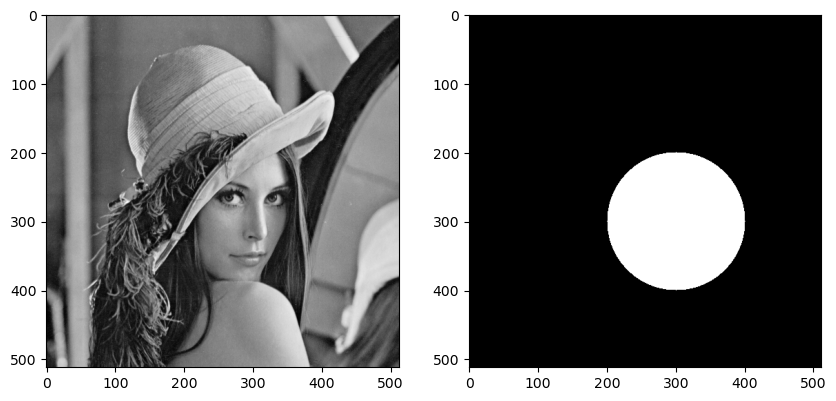

In [22]:
circleMask = np.zeros_like(inputImage)
cv2.circle(circleMask,(300,300), 100, (255),-1)
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(inputImage, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(circleMask, cmap='gray')
plt.show()

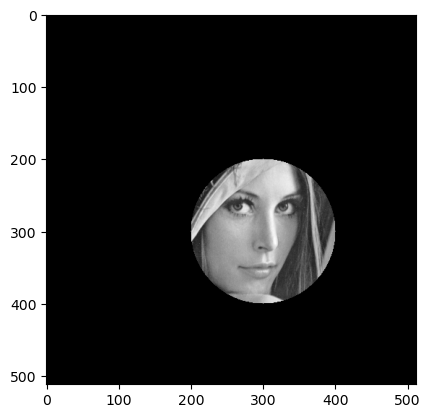

In [23]:
### FILL HERE ### (Very easy)
croppedImage = (inputImage * (circleMask / 255))
plt.imshow(croppedImage, cmap='gray')
#################

## Basic Image Filtering
OpenCV already provided us with a wide range of filtering operation. The most common one is image blurring which is useful for removing noises. It actually removes high frequency content (eg: noise, edges) from the image.

### 1. Mean filter using <a href="https://docs.opencv.org/3.4.2/d4/d86/group__imgproc__filter.html#ga8c45db9afe636703801b0b2e440fce37">cv2.blur</a> function
Simply takes the average of all the pixels in the kernel area

In [24]:
def cv2Blur(kernelSize):
    blurImage = cv2.blur(inputImage,(kernelSize,kernelSize))
    plt.figure(figsize=(5,5))
    plt.imshow(blurImage, cmap='gray')
    plt.show()
interact(cv2Blur, kernelSize=widgets.IntSlider(min=1,max=35,step=2,value=1));

interactive(children=(IntSlider(value=1, description='kernelSize', max=35, min=1, step=2), Output()), _dom_cla…

In [25]:
print(f"Image dtype: {inputImage.dtype}, shape: {inputImage.shape}")

Image dtype: uint8, shape: (512, 512)


### 2. Median Blur using <a href="https://docs.opencv.org/3.4.2/d4/d86/group__imgproc__filter.html#ga564869aa33e58769b4469101aac458f9">cv2.medianBlur</a>
Read the document and try to "mimic" the above interactive visualization! <a href="https://docs.opencv.org/3.4.2/d4/d86/group__imgproc__filter.html#ga564869aa33e58769b4469101aac458f9">cv2.medianBlur</a>

In [26]:
### FILL HERE ###
def cv2MedianBlur(kernelSize):
    if kernelSize < 3:
        kernelSize = 3
    if kernelSize % 2 == 1:
        pass
    else: 
        kernelSize += 1
        
    # kernelSize = max(3, kernelSize + (kernelSize % 2 == 0))

    if inputImage.dtype != np.uint8:
        # Scale image to [0, 255] if needed
        scaledImage = (inputImage * 255) if inputImage.max() <= 1.0 else inputImage
        imageToProcess = scaledImage.astype(np.uint8)
    else:
        imageToProcess = inputImage

    MedianBlurImage = cv2.medianBlur(imageToProcess, kernelSize)
    plt.figure(figsize=(5,5))
    plt.imshow(MedianBlurImage, cmap='gray')
    plt.show()
interact(cv2MedianBlur, kernelSize=widgets.IntSlider(min=3,max=35,step=2,value=3));

#################

interactive(children=(IntSlider(value=3, description='kernelSize', max=35, min=3, step=2), Output()), _dom_cla…

### 3. Gaussian Blur using <a href="https://docs.opencv.org/3.4.2/d4/d86/group__imgproc__filter.html#gaabe8c836e97159a9193fb0b11ac52cf1">cv2.GaussianBlur</a>
Gaussian blurring is highly effective in removing gaussian noise from the image. <a href="https://docs.opencv.org/3.4.2/d4/d86/group__imgproc__filter.html#gaabe8c836e97159a9193fb0b11ac52cf1">cv2.GaussianBlur</a>

In [27]:
def cv2GaussianBlur(kernelSize,sigmaX):
    gaussianBlurImage = cv2.GaussianBlur(inputImage,(kernelSize,kernelSize),sigmaX)
    print(cv2.getGaussianKernel(kernelSize,sigmaX))
    plt.figure(figsize=(5,5))
    plt.imshow(gaussianBlurImage, cmap='gray')
    plt.show()
interact(cv2GaussianBlur, kernelSize=widgets.IntSlider(min=1,max=35,step=2,value=1),sigmaX=widgets.IntSlider(min=1,max=35,step=2,value=1));

interactive(children=(IntSlider(value=1, description='kernelSize', max=35, min=1, step=2), IntSlider(value=1, …

### 4. Bilateral Filter ==> <a href="https://docs.opencv.org/3.4.2/d4/d86/group__imgproc__filter.html#ga9d7064d478c95d60003cf839430737ed">cv2.bilateralFilter</a>
Bilateral filter can reduce unwanted noise very well while keeping edges fairly sharp. However, it is very slow compared to most filters.
Read the document and try to "mimic" the above interactive visualization! <a href="https://docs.opencv.org/3.4.2/d4/d86/group__imgproc__filter.html#ga9d7064d478c95d60003cf839430737ed">cv2.bilateralFilter</a>

In [28]:
### FILL HERE ###
def cv2BilateralFilter(kernelSize):
    kernelSize = max(1, kernelSize)
    processedImage = (inputImage * 255).astype(np.uint8) if inputImage.max() <= 1 else inputImage.astype(np.uint8)    
    BilateralImage = cv2.bilateralFilter(processedImage, d=kernelSize, sigmaColor=75, sigmaSpace=75)
    plt.figure(figsize=(5,5))
    plt.imshow(BilateralImage, cmap='gray')
    plt.show()
interact(cv2BilateralFilter, kernelSize=widgets.IntSlider(min=1,max=35,step=2,value=1));
#################


interactive(children=(IntSlider(value=1, description='kernelSize', max=35, min=1, step=2), Output()), _dom_cla…

### 5. Custom Kernel Filtering ==> <a href="https://docs.opencv.org/3.4.2/d4/d86/group__imgproc__filter.html#ga27c049795ce870216ddfb366086b5a04">cv2.filter2D</a>
<a href="https://docs.opencv.org/3.4.2/d4/d86/group__imgproc__filter.html#ga27c049795ce870216ddfb366086b5a04">cv2.filter2D</a>

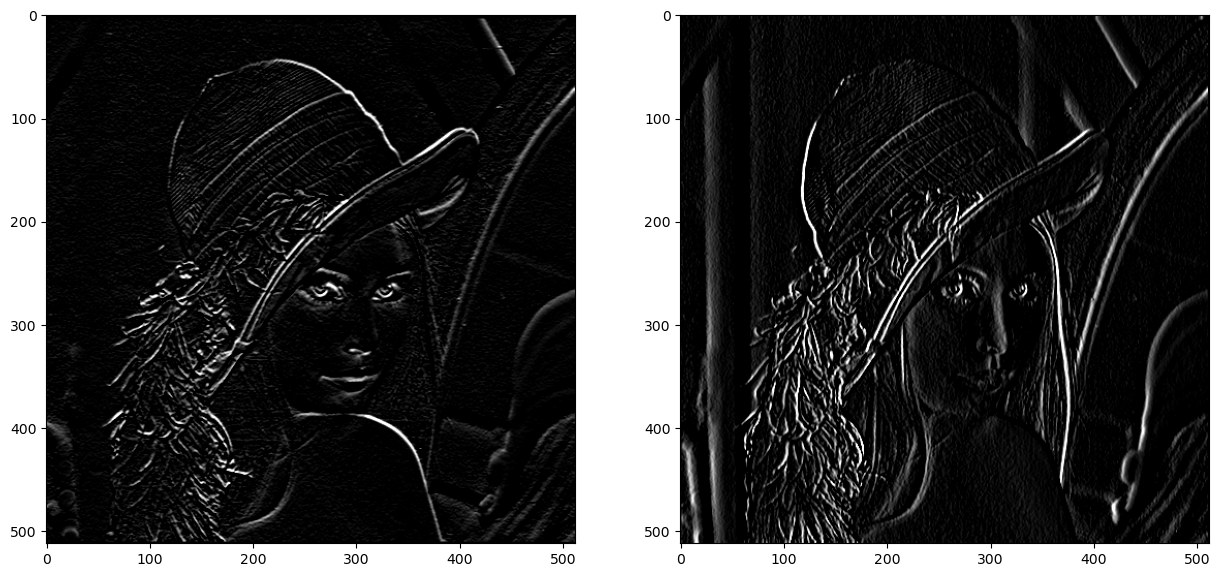

'\nWhat are these mysterious kernels do in your opinion?\n\nxKernel = Horizontal edge detection filter \nyKernel = Vertical edge detection filter\n'

In [29]:
xKernel = np.array([[-1,-2,-1],[0,0,0],[1,2,1]]) # Mysterious Kernel?
yKernel = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
filter2DOutput1 = cv2.filter2D(inputImage,-1,xKernel)
filter2DOutput2 = cv2.filter2D(inputImage,-1,yKernel)
plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.imshow(filter2DOutput1, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(filter2DOutput2, cmap='gray')
plt.show()

'''
What are these mysterious kernels do in your opinion?

xKernel = Horizontal edge detection filter 
yKernel = Vertical edge detection filter
'''

### 6. Custom Kernel ==> Image Sharpening
More details in next class :)

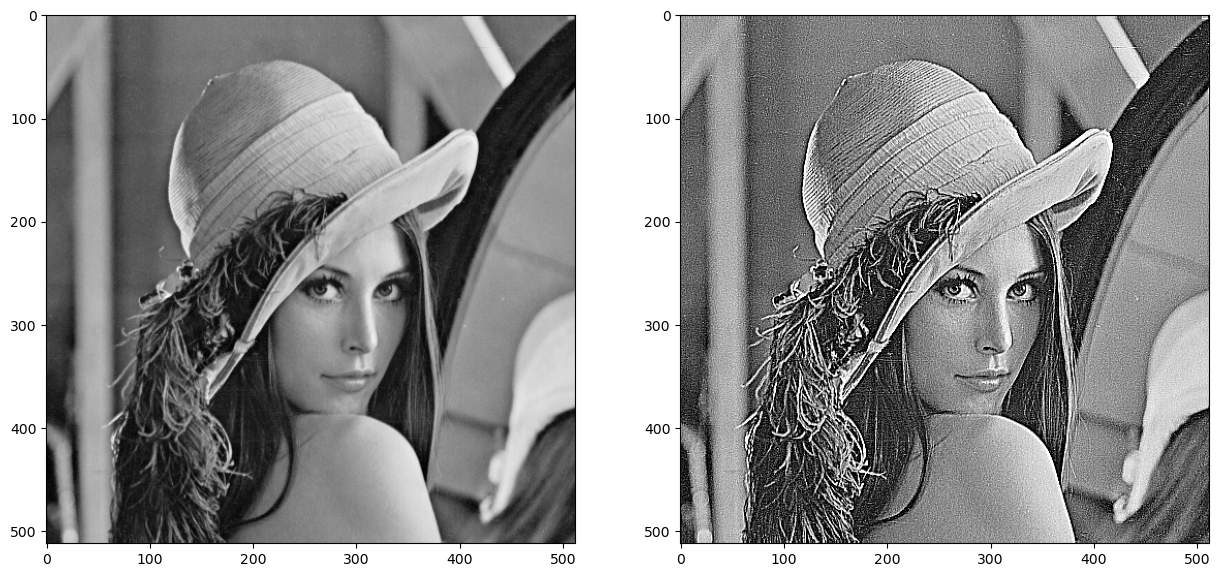

In [30]:
sharpenKernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
sharpenOutput = cv2.filter2D(inputImage, -1, sharpenKernel)
plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.imshow(inputImage, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(sharpenOutput, cmap='gray')
plt.show()

## Assignment 2 - Which filter is the best?
The provided api will generate random artificial noises into the image. Your task is to implement the best way <b>(in your opinion)</b> to remove/eliminate those noises. Don't forget to state your reason in the following block. The answer can be in either Thai or English.

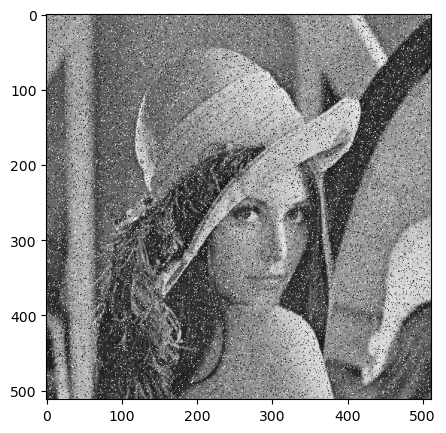

uint8


In [31]:
out1 = np.array(json.loads(urllib.request.urlopen('https://www.piclab.ai/classes/cv2024/lab2/noise1').read().decode('utf-8')),dtype=np.uint8)
plt.figure(figsize=(5,5))
plt.imshow(out1, cmap='gray')
plt.show()
print(out1.dtype)

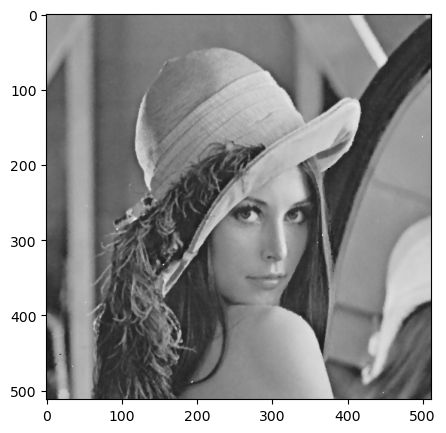

'\nState your reason in this block!\n\nUse Median Blur, because this image contains salt-and-pepper noise. \nThis filter can replace the outlier pixel value with a value close to its neighbors.\n'

In [32]:
### FILL HERE ###

medianBlurImage = cv2.medianBlur(out1, 3)
plt.figure(figsize=(5,5))
plt.imshow(medianBlurImage, cmap='gray')
plt.show()

#################
'''
State your reason in this block!

Use Median Blur, because this image contains salt-and-pepper noise. 
This filter can replace the outlier pixel value with a value close to its neighbors.
'''

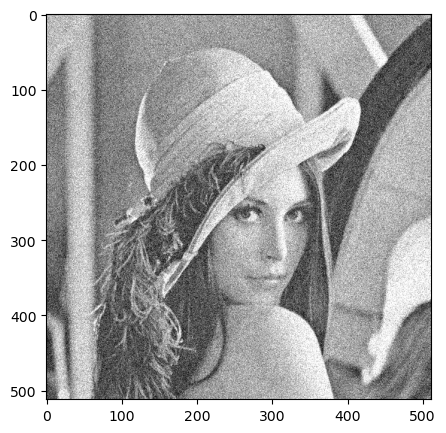

In [33]:
out2 = np.array(json.loads(urllib.request.urlopen('https://www.piclab.ai/classes/cv2024/lab2/noise2').read().decode('utf-8')),dtype=np.uint8)
plt.figure(figsize=(5,5))
plt.imshow(out2, cmap='gray')
plt.show()

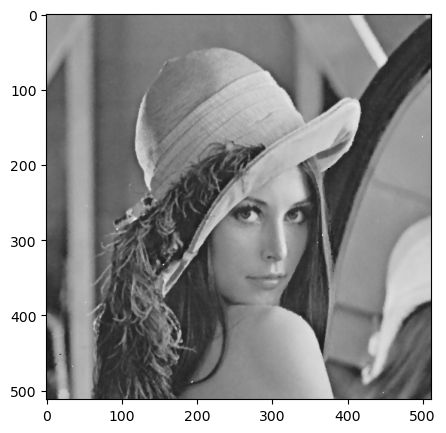

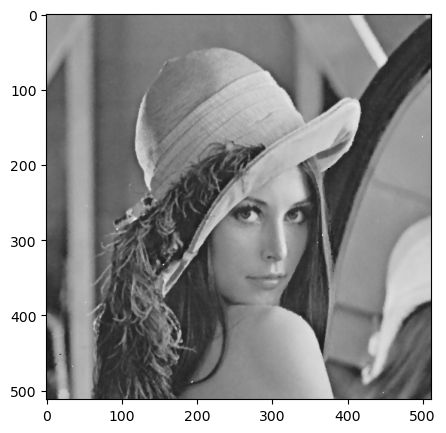

'\nState your reason in this block!\n\nWe can use a Gaussian Blur filter or a Bilateral Filter, because this image contains a Gaussian noise. \nIf we use a Bilateral Filter, the image preserves edges while smoothing.\n'

In [34]:
### FILL HERE ###

gaussianBlurImage = cv2.GaussianBlur(out2, (3, 3), sigmaX=3)
plt.figure(figsize=(5,5))
plt.imshow(medianBlurImage, cmap='gray')
plt.show()



bilateralBlurImage = cv2.bilateralFilter(out2, 3, sigmaColor=75, sigmaSpace=75) 
plt.figure(figsize=(5,5))
plt.imshow(medianBlurImage, cmap='gray')
plt.show()

#################
'''
State your reason in this block!

We can use a Gaussian Blur filter or a Bilateral Filter, because this image contains a Gaussian noise. 
If we use a Bilateral Filter, the image preserves edges while smoothing.
'''

## Assignment 3 - Implementing your own filter2D function
![title](assets/Lab2-filter2D.png)

In this part, you will implement the image filter function by yourself. This function should have the function signature as shown below.
```python
def myFilter2D(inputImage, kernel, paddingMethod="constant", paddingValue=0):
    if paddingMethod == "constant":
        ???
    elif paddingMethod == "replicate":
        ???
    elif paddingMethod == "valid":
        ???
    else
        print("Undefined padding method")
    return outputImage
```
You must implement 3 padding method
1. Constant ("constant")
2. Replicate border value ("replicate")
3. No Padding ("valid")


<b>Do not use OpenCV filter2D !! You must implement this function by your own</b><br>
<b>Hint</b> 
- Numpy has a padding function! Use Google!!!
- Do not forget about each data type range. More details can be read from <a href="https://numpy.org/doc/stable/user/basics.types.html">here</a>

In [35]:
#### Your filter2D function! ####

import numpy as np

def myFilter2D(inputImage, kernel, paddingMethod="constant", paddingValue=0):
    # Convert inputs to numpy arrays if they aren't already
    inputImage = np.array(inputImage)
    kernel = np.array(kernel)
    
    # Get dimensions
    kernel_height, kernel_width = kernel.shape
    pad_h = kernel_height // 2
    pad_w = kernel_width // 2
    
    # Handle different padding methods
    if paddingMethod == "constant":
        # Use np.pad with constant values
        padded_image = np.pad(inputImage, 
                            ((pad_h, pad_h), (pad_w, pad_w)),
                            mode='constant',
                            constant_values=paddingValue)
    
    elif paddingMethod == "replicate":
        # Use np.pad with edge values
        padded_image = np.pad(inputImage,
                            ((pad_h, pad_h), (pad_w, pad_w)),
                            mode='edge')
    
    elif paddingMethod == "valid":
        # No padding
        padded_image = inputImage
    
    else:
        print("Undefined padding method")
        return None
    
    # Get dimensions of padded image
    padded_height, padded_width = padded_image.shape
    
    # Initialize output image
    if paddingMethod == "valid":
        output_height = padded_height - kernel_height + 1
        output_width = padded_width - kernel_width + 1
    else:
        output_height = inputImage.shape[0]
        output_width = inputImage.shape[1]
    
    outputImage = np.zeros((output_height, output_width))
    
    # Apply convolution
    for i in range(output_height):
        for j in range(output_width):
            # Extract region of interest
            roi = padded_image[i:i + kernel_height, j:j + kernel_width]
            # Apply kernel and sum
            outputImage[i, j] = np.sum(roi * kernel)
    
    return outputImage

In [36]:
if __name__ == "__main__":
    # Create test image
    test_image = np.array([
        [50, 100, 150],
        [100, 150, 200],
        [150, 200, 250]
    ], dtype=np.uint8)
    
    # Create mean filter
    mean_kernel = np.ones((3, 3)) / 9.0
    
    # Test all padding methods
    output_constant = myFilter2D(test_image, mean_kernel, "constant", 0)
    output_replicate = myFilter2D(test_image, mean_kernel, "replicate")
    output_valid = myFilter2D(test_image, mean_kernel, "valid")
    
    print("Original image:")
    print(test_image)
    print("\nFiltered with constant padding:")
    print(output_constant)
    print("\nFiltered with replicate padding:")
    print(output_replicate)
    print("\nFiltered with valid padding:")
    print(output_valid)

Original image:
[[ 50 100 150]
 [100 150 200]
 [150 200 250]]

Filtered with constant padding:
[[ 44.44444444  83.33333333  66.66666667]
 [ 83.33333333 150.         116.66666667]
 [ 66.66666667 116.66666667  88.88888889]]

Filtered with replicate padding:
[[ 83.33333333 116.66666667 150.        ]
 [116.66666667 150.         183.33333333]
 [150.         183.33333333 216.66666667]]

Filtered with valid padding:
[[150.]]
